# **Gadient Boosting Classifier**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **Pre Processing**

In [ ]:
   df=pd.read_csv('/content/Movie_classification.csv')
   df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [ ]:
df.columns

Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       '3D_available', 'Time_taken', 'Twitter_hastags', 'Genre',
       'Avg_age_actors', 'Num_multiplex', 'Collection', 'Start_Tech_Oscar'],
      dtype='object')

In [ ]:
df.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510,0.545455
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,18364.351764,0.498422
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,34050.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,42400.000000,1.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,50000.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [ ]:
df.shape

(506, 19)

**Duplicates**

In [ ]:
df[df.duplicated()]

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar


**Null Values**

In [ ]:
df.isnull().sum()

,0
Marketing expense,0
Production expense,0
Multiplex coverage,0
Budget,0
Movie_length,0
Lead_ Actor_Rating,0
Lead_Actress_rating,0
Director_rating,0
Producer_rating,0
Critic_rating,0


In [ ]:
mean=df['Time_taken'].mean()
df['Time_taken']=df['Time_taken'].fillna(mean)

In [ ]:
df['Time_taken'].isnull().sum()

0


# Exploratory Data Analysis


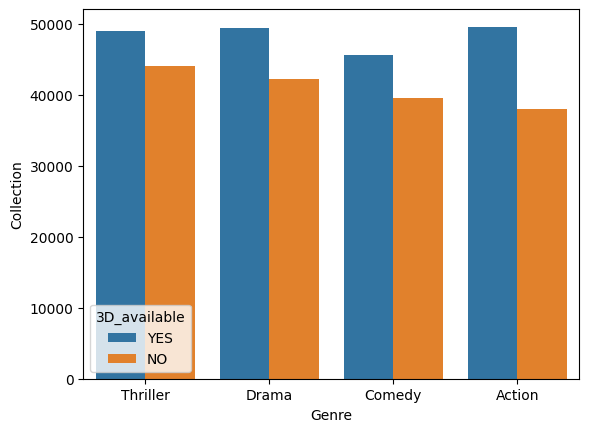

In [ ]:
sns.barplot(data=df,x='Genre',y='Collection',ci=0,hue='3D_available')
plt.show()

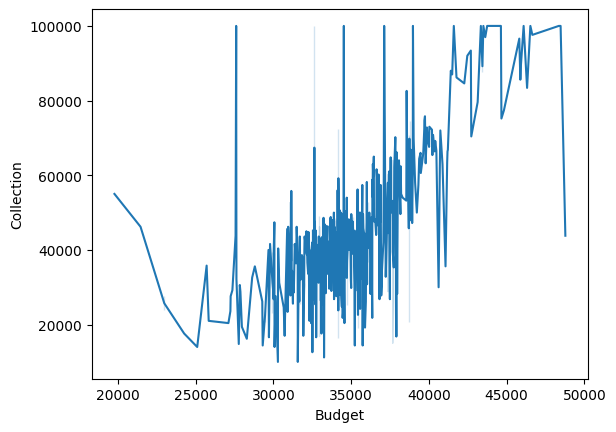

In [ ]:
sns.lineplot(data=df,x='Budget',y='Collection')
plt.show()

<Axes: xlabel='Collection', ylabel='Count'>

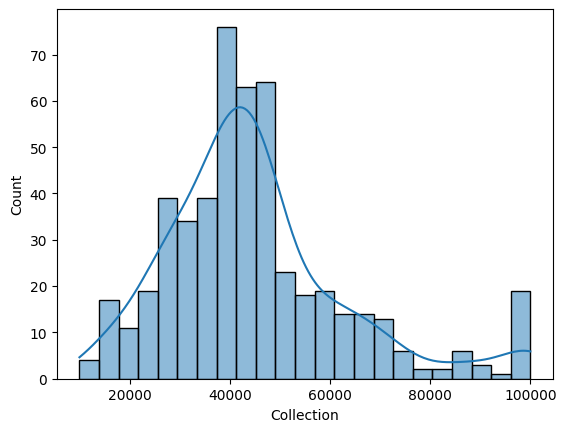

In [ ]:
sns.histplot(data=df,x='Collection',kde=True)

In [ ]:
overallrating=(df['Lead_ Actor_Rating']+ df['Lead_Actress_rating']+df['Director_rating'] +df['Producer_rating']+df ['Critic_rating'])/5

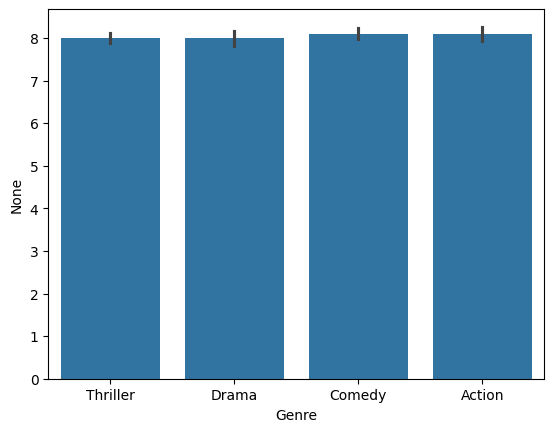

In [ ]:
sns.barplot(data=df,x='Genre',y=overallrating)
plt.show()

[]

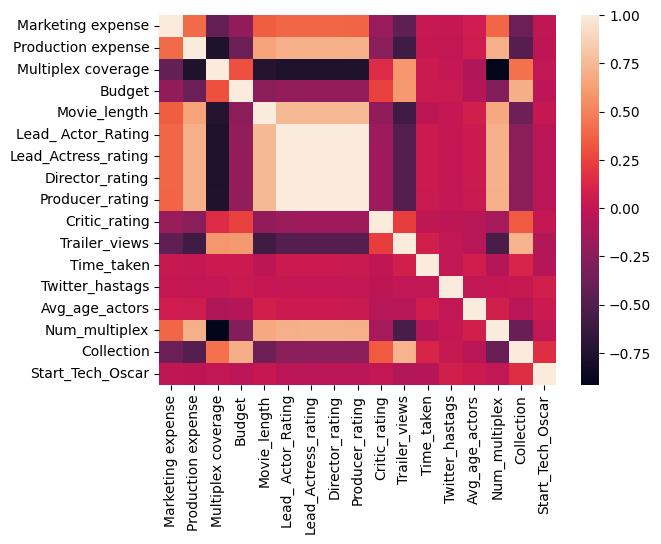

In [ ]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr)
plt.plot()

<Axes: xlabel='Twitter_hastags', ylabel='Density'>

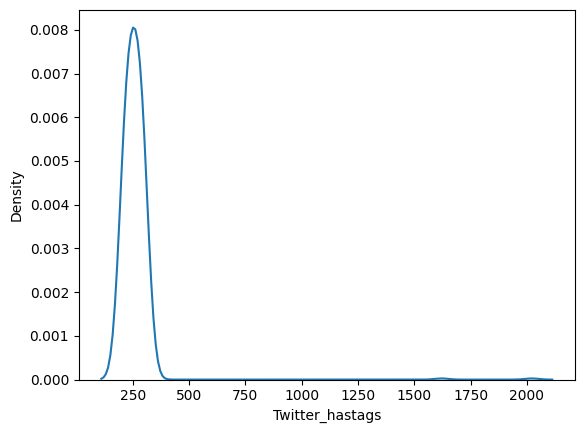

In [ ]:
sns.kdeplot(data=df,x='Twitter_hastags')

<Axes: >

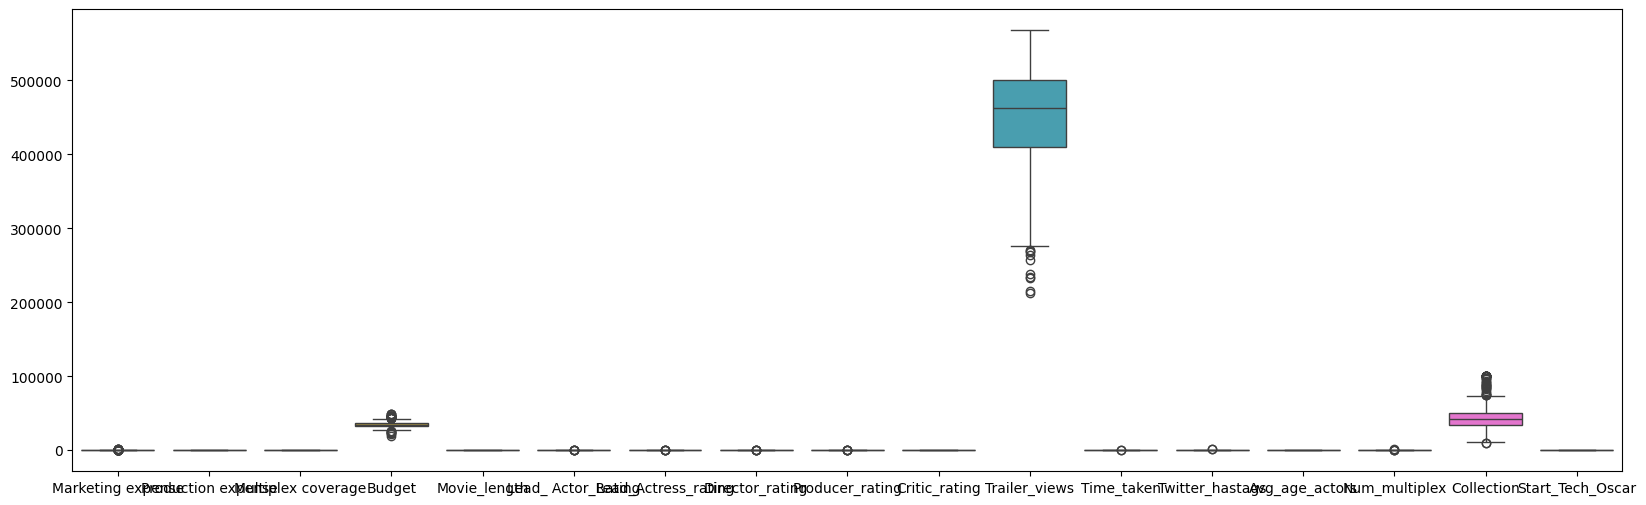

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(df)

# **Feature Engineering**

In [ ]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


**Converting catcols to numeric**

In [ ]:
df['Genre'].value_counts()

,count
Genre,
Thriller,183
Comedy,155
Drama,97
Action,71


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse=False)
unique_genres=ohe.fit_transform(df[['Genre']])
df1=pd.DataFrame(unique_genres,columns=ohe.get_feature_names_out(['Genre']))
df1

,Genre_Comedy,Genre_Drama,Genre_Thriller
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
501,0.0,0.0,0.0
502,0.0,0.0,0.0
503,1.0,0.0,0.0
504,1.0,0.0,0.0


In [ ]:
df=pd.concat([df,df1],axis=1)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,Thriller,23,494,48000,1,0.0,0.0,1.0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,Drama,42,462,43200,0,0.0,1.0,0.0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,Comedy,38,458,69400,1,1.0,0.0,0.0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,Drama,45,472,66800,1,0.0,1.0,0.0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,Drama,55,395,72400,1,0.0,1.0,0.0


In [ ]:
df.drop('Genre',axis=1,inplace=True)

In [ ]:
df.shape

(506, 21)

In [ ]:
df['3D_available'].value_counts()

,count
3D_available,
YES,279
NO,227


In [ ]:
mapping={
    "YES":1,
    'NO':0
}
df['3D_available']=df['3D_available'].map(mapping)

In [ ]:
df['3D_available'].head()

,3D_available
0,1
1,0
2,0
3,1
4,0


In [ ]:
df['Rating']=(df['Lead_ Actor_Rating']+ df['Lead_Actress_rating']+df['Director_rating'] +df['Producer_rating']+df ['Critic_rating'])/5

In [ ]:
df.drop(columns=['Lead_ Actor_Rating','Lead_Actress_rating','Director_rating','Producer_rating','Critic_rating'],axis=1,inplace=True)

In [ ]:
df.shape

(506, 17)

In [ ]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Trailer_views,3D_available,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Genre_Comedy,Genre_Drama,Genre_Thriller,Rating
0,20.1264,59.62,0.462,36524.125,138.7,527367,1,109.60,223.840,23,494,48000,1,0.0,0.0,1.0,7.953
1,20.5462,69.14,0.531,35668.655,152.4,494055,0,146.64,243.456,42,462,43200,0,0.0,1.0,0.0,7.501
2,20.5458,69.14,0.531,39912.675,134.6,547051,0,147.88,2022.400,38,458,69400,1,1.0,0.0,0.0,7.501
3,20.6474,59.36,0.542,38873.890,119.3,516279,1,185.36,225.344,45,472,66800,1,0.0,1.0,0.0,7.226
4,21.3810,59.36,0.542,39701.585,127.7,531448,0,176.48,225.792,55,395,72400,1,0.0,1.0,0.0,7.227


<Axes: >

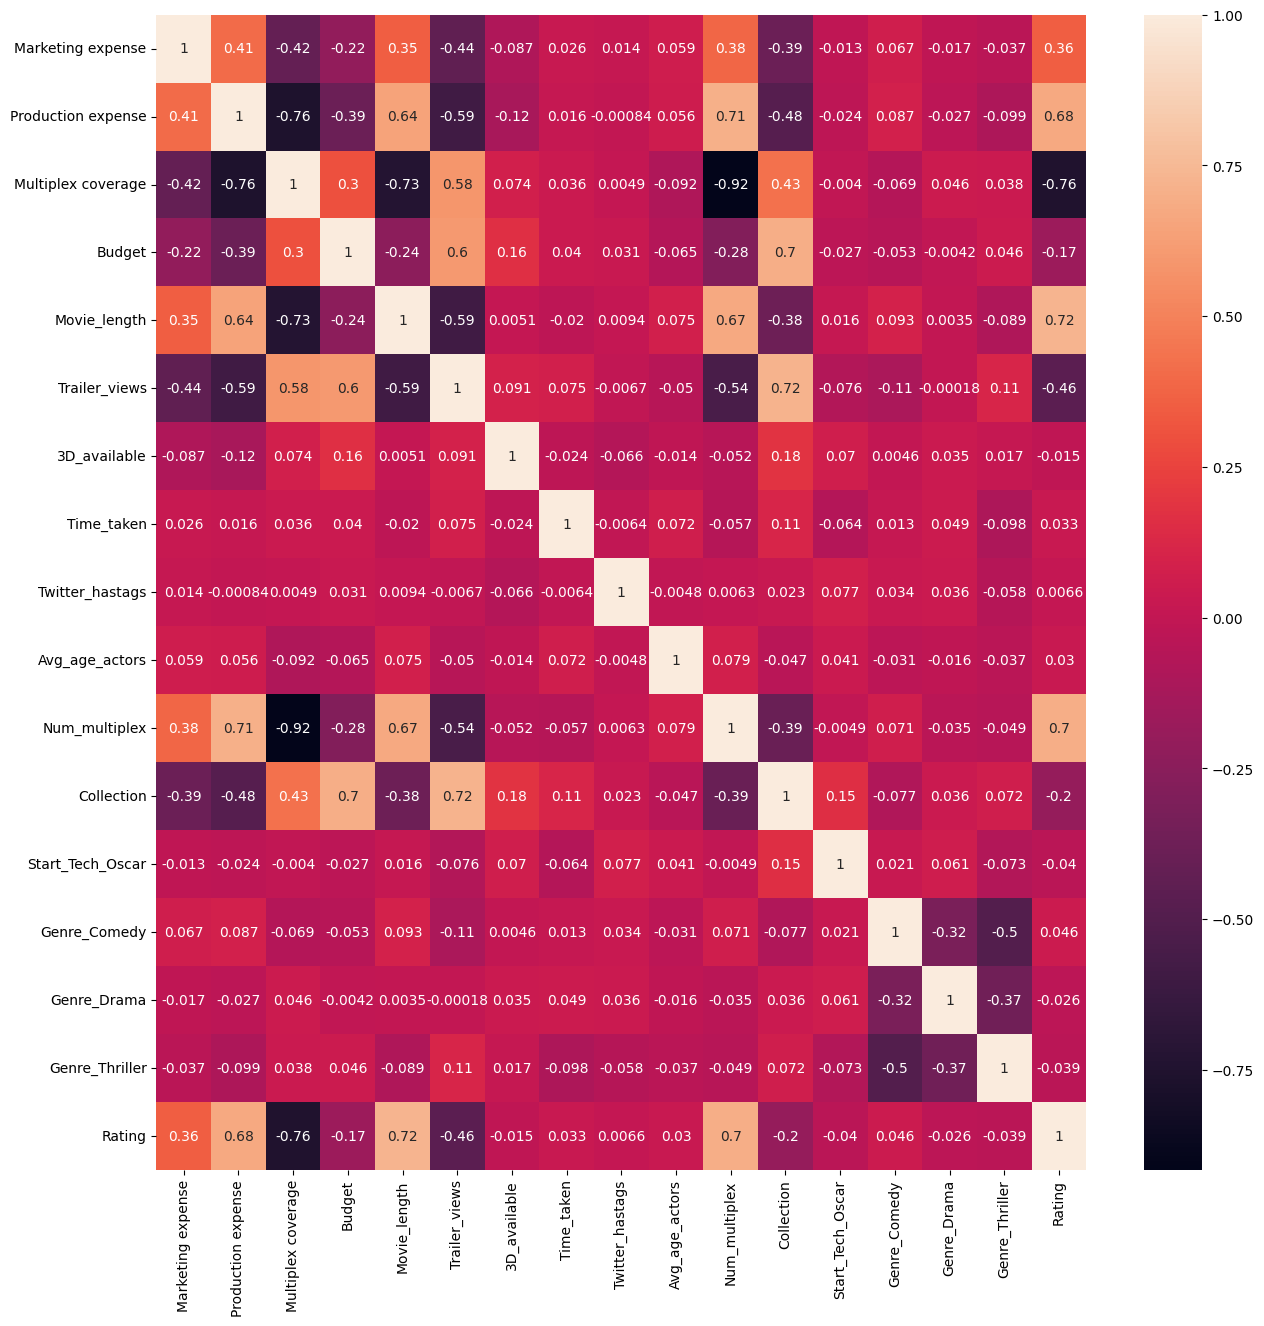

In [ ]:
cr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cr,annot=True)

In [ ]:
X=df.drop('Start_Tech_Oscar',axis=1)
y=df['Start_Tech_Oscar']

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Assuming df is your DataFrame
X = df.drop('Start_Tech_Oscar', axis=1)
y = df['Start_Tech_Oscar']

# Initialize SelectKBest
selectbest = SelectKBest(score_func=chi2, k='all')

# Fit and transform the data
selectbest.fit(X, y)

# Get feature names, chi2 values, and p-values
feature_names = X.columns
chi2val = selectbest.scores_
pval = selectbest.pvalues_

# Create a DataFrame to display the results
fs = pd.DataFrame({
    'Feature': feature_names,
    'Chi2 Score': chi2val,
    'P-Value': pval
})

# Print the DataFrame
print(fs)


               Feature    Chi2 Score       P-Value
0    Marketing expense     29.156615  6.675744e-08
1   Production expense      0.732741  3.919962e-01
2   Multiplex coverage      0.000246  9.874933e-01
3               Budget    162.404292  3.375694e-37
4         Movie_length      0.747503  3.872679e-01
5        Trailer_views  30620.842724  0.000000e+00
6         3D_available      1.124134  2.890301e-01
7           Time_taken     12.468627  4.138442e-04
8      Twitter_hastags    127.119151  1.749484e-29
9       Avg_age_actors      3.323642  6.829038e-02
10       Num_multiplex      0.247155  6.190856e-01
11          Collection  90457.574008  0.000000e+00
12        Genre_Comedy      0.156774  6.921440e-01
13         Genre_Drama      1.542612  2.142295e-01
14      Genre_Thriller      1.713843  1.904875e-01
15              Rating      0.067682  7.947424e-01


In [ ]:
df.drop(columns=['Num_multiplex','Rating','Production expense'],axis=1,inplace=True)

# **Train test split**

In [ ]:
X=df.drop('Start_Tech_Oscar',axis=1)
y=df['Start_Tech_Oscar']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=18,shuffle=True)
X_train.shape,X_test.shape

((354, 13), (152, 13))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# **Model Creation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

all_models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,roc_curve,confusion_matrix
def performance(y_test,y_pred):
  print(confusion_matrix(y_test,y_pred))
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))

In [ ]:
for name,models in all_models.items():
  print(name)
  model=models
  print('-------------------')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  performance(y_test,y_pred)

Logistic Regression
-------------------
[[39 25]
 [32 56]]
0.625
              precision    recall  f1-score   support

           0       0.55      0.61      0.58        64
           1       0.69      0.64      0.66        88

    accuracy                           0.62       152
   macro avg       0.62      0.62      0.62       152
weighted avg       0.63      0.62      0.63       152

Support Vector Classifier
-------------------
[[30 34]
 [35 53]]
0.5460526315789473
              precision    recall  f1-score   support

           0       0.46      0.47      0.47        64
           1       0.61      0.60      0.61        88

    accuracy                           0.55       152
   macro avg       0.54      0.54      0.54       152
weighted avg       0.55      0.55      0.55       152

Gaussian Naive Bayes
-------------------
[[49 15]
 [54 34]]
0.5460526315789473
              precision    recall  f1-score   support

           0       0.48      0.77      0.59        64
         

In [ ]:
models_hyperparameters = [
    ('Logistic Regression', LogisticRegression(), {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 200, 300],
        'class_weight': [None, 'balanced']
    }),
    ('Support Vector Classifier', SVC(), {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [3, 4, 5],  # only for 'poly' kernel
        'gamma': ['scale', 'auto'],  # or float
        'class_weight': [None, 'balanced']
    }),
    ('Gaussian Naive Bayes', GaussianNB(), {
        'var_smoothing': [1e-9, 1e-8, 1e-7]  # Smoothing parameter
    }),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
    }),
    ('Decision Tree', DecisionTreeClassifier(), {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'auto', 'sqrt', 'log2']
    }),
    ('AdaBoost', AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1, 10],
        'algorithm': ['SAMME', 'SAMME.R']
    }),
    ('Gradient Boosting', GradientBoostingClassifier(), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.001, 0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5, 6],
        'subsample': [0.8, 0.9, 1.0],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'auto', 'sqrt', 'log2']
    })
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
for name,model,parameter in models_hyperparameters:
  rand=RandomizedSearchCV(estimator=model,param_distributions=parameter,scoring='accuracy',random_state=18)
  rand.fit(X_train,y_train)
  y_pred=rand.predict(X_test)
  print(name)
  print('----------------')
  performance(y_test,y_pred)

Logistic Regression
----------------
[[41 23]
 [37 51]]
0.6052631578947368
              precision    recall  f1-score   support

           0       0.53      0.64      0.58        64
           1       0.69      0.58      0.63        88

    accuracy                           0.61       152
   macro avg       0.61      0.61      0.60       152
weighted avg       0.62      0.61      0.61       152

Support Vector Classifier
----------------
[[42 22]
 [41 47]]
0.5855263157894737
              precision    recall  f1-score   support

           0       0.51      0.66      0.57        64
           1       0.68      0.53      0.60        88

    accuracy                           0.59       152
   macro avg       0.59      0.60      0.59       152
weighted avg       0.61      0.59      0.59       152

Gaussian Naive Bayes
----------------
[[49 15]
 [54 34]]
0.5460526315789473
              precision    recall  f1-score   support

           0       0.48      0.77      0.59        64
     

roc curve



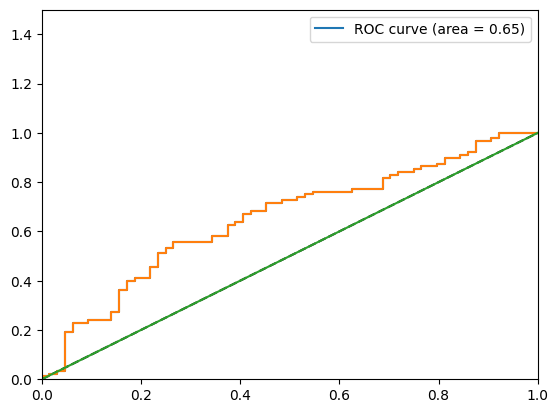

In [ ]:
from sklearn.metrics import roc_auc_score,auc
from sklearn.preprocessing import label_binarize

grad = GradientBoostingClassifier()
grad.fit(X_train, y_train)

# Predict probabilities for the test set
prob = grad.predict_proba(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')

# Plot diagonal line (Random classifier)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlim([0,1])
plt.ylim([0,1.5])
plt.legend()
plt.show()